In [1]:
import cv2

flags = [i for i in dir(cv2) if i.startswith('COLOR_')]

len(flags)
flags[40]

'COLOR_BAYER_GR2GRAY'

In [2]:
import matplotlib.pyplot as plt
import numpy as np

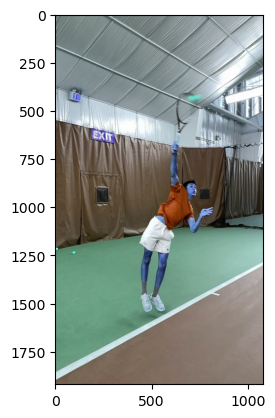

In [3]:
racket = cv2.imread('1tennis#1/1contact#1.jpg')
plt.imshow(racket)
plt.show()

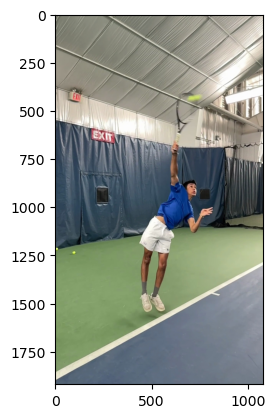

In [4]:
racket = cv2.cvtColor(racket, cv2.COLOR_BGR2RGB)
plt.imshow(racket)
plt.show()

In [5]:
hsv_racket = cv2.cvtColor(racket, cv2.COLOR_RGB2HSV)

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

In [7]:
pixel_colors = racket.reshape((np.shape(racket)[0]*np.shape(racket)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

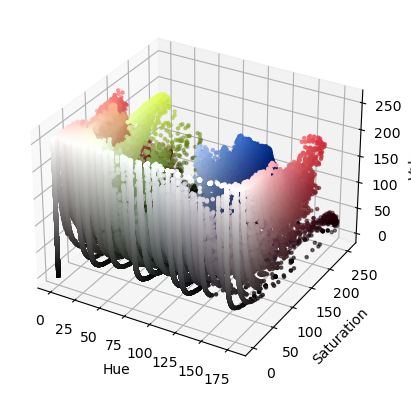

In [8]:
h, s, v = cv2.split(hsv_racket)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [38]:
light_black = (37, 24, 13)
dark_black = (42, 16, 31)
mid_black = (43, 12, 22)
white = (0, 0, 255)

In [39]:
from matplotlib.colors import hsv_to_rgb

In [40]:
lo_square = np.full((10, 10, 3), light_black, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), white, dtype=np.uint8) / 255.0

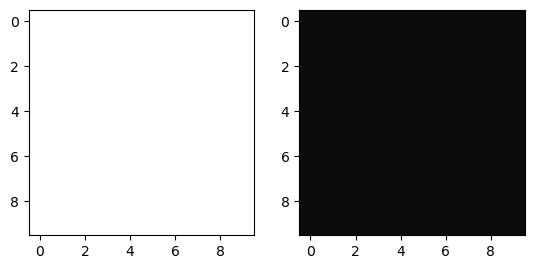

In [41]:
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

In [47]:
mask = cv2.inRange(hsv_racket, white, light_black)

In [48]:
result = cv2.bitwise_and(racket, racket, mask=mask)

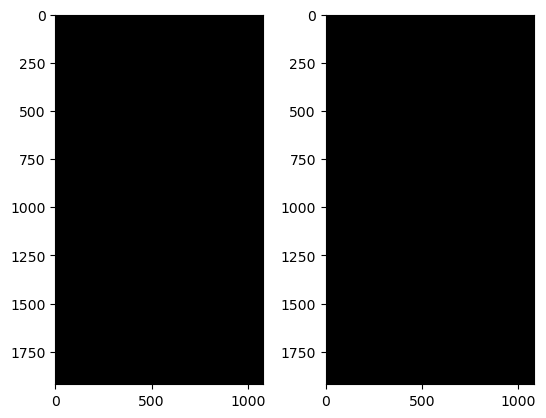

In [49]:
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

In [50]:
print (mask)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [51]:
print (sum(mask))

[0 0 0 ... 0 0 0]
